IMPORTING FOLDER FROM DRIVE WHICH HAS 3 FOLDERS TRAIN,TEST AND VALIDATION IN EACH FOLDER THERE ARE 3 FOLDERS LIKE EARLY BLIGHT,LATE BLIGHT AND HEALTHY

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMPORTING NECESSARY LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout

FETCHING DATA FROM FOLDERS AND ASSIGNING IT TO SPECIFIC LABELS

In [ ]:
train_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive/PLD_3_Classes_256/Training",
    labels="inferred",
    label_mode="int",
    batch_size=256,
    image_size=(256, 256)
)
test_dataset=keras.utils.image_dataset_from_directory(
    directory="/content/drive/MyDrive/archive/PLD_3_Classes_256/Validation",
    labels="inferred",
    label_mode="int",
    batch_size=256,
    image_size=(256, 256)
)

Found 3251 files belonging to 3 classes.
Found 416 files belonging to 3 classes.


BUILDING MODEL

In [ ]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3,activation='softmax'))
model.build(input_shape=(256 , 256 ,256 , 3))

OPTIMIZING THE MODEL

In [ ]:
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy',metrics=['accuracy'])

FITTING THE MODEL

In [ ]:
ml_model=model.fit(train_dataset,epochs=12,validation_data=test_dataset)

Epoch 1/12
13/13 [==============================] - 60s 2s/step - loss: 7.5824 - accuracy: 0.5254 - val_loss: 27.8515 - val_accuracy: 0.4471
Epoch 2/12
13/13 [==============================] - 18s 893ms/step - loss: 1.8137 - accuracy: 0.6635 - val_loss: 15.8076 - val_accuracy: 0.4423
Epoch 3/12
13/13 [==============================] - 19s 881ms/step - loss: 1.1053 - accuracy: 0.7219 - val_loss: 11.6969 - val_accuracy: 0.3822
Epoch 4/12
13/13 [==============================] - 18s 930ms/step - loss: 0.7597 - accuracy: 0.7619 - val_loss: 6.3926 - val_accuracy: 0.4615
Epoch 5/12
13/13 [==============================] - 18s 873ms/step - loss: 0.6215 - accuracy: 0.8034 - val_loss: 3.7865 - val_accuracy: 0.4880
Epoch 6/12
13/13 [==============================] - 18s 889ms/step - loss: 0.4790 - accuracy: 0.8391 - val_loss: 2.5241 - val_accuracy: 0.5264
Epoch 7/12
13/13 [==============================] - 18s 874ms/step - loss: 0.4760 - accuracy: 0.8524 - val_loss: 1.8433 - val_accuracy: 0.5769

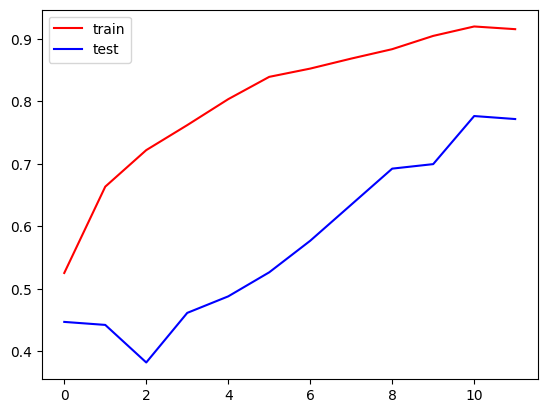

In [ ]:
import matplotlib.pyplot as plt
plt.plot(ml_model.history['accuracy'],color='red',label='train')
plt.plot(ml_model.history['val_accuracy'],color='blue',label='test')
plt.legend()
plt.show()

In [ ]:
import numpy as np
labels = {
    0: 'Early_Blight',
    1: 'Healthy',
    2: 'Late_Blight'
}

1/1 [==============================] - 0s 17ms/step
The predicted label for image is: Early_Blight


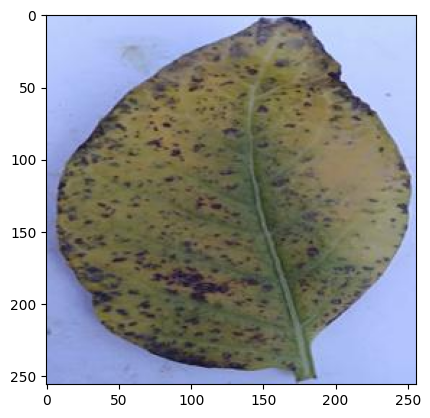

In [ ]:
image='/content/Early_Blight_994.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")

1/1 [==============================] - 0s 18ms/step
The predicted label for image is: Early_Blight


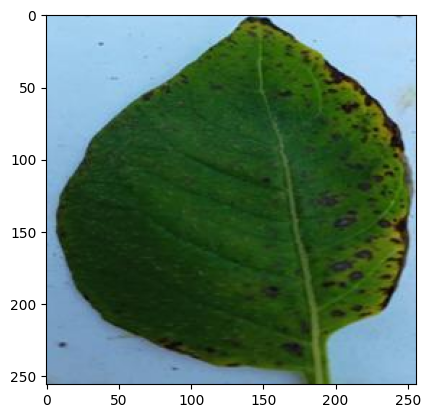

In [ ]:
image='/content/Early_Blight_995.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")

1/1 [==============================] - 0s 29ms/step
The predicted label for image is: Healthy


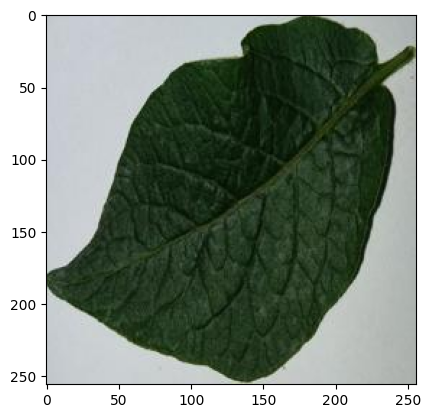

In [ ]:
image='/content/Healthy_9.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")

1/1 [==============================] - 0s 26ms/step
The predicted label for image is: Late_Blight


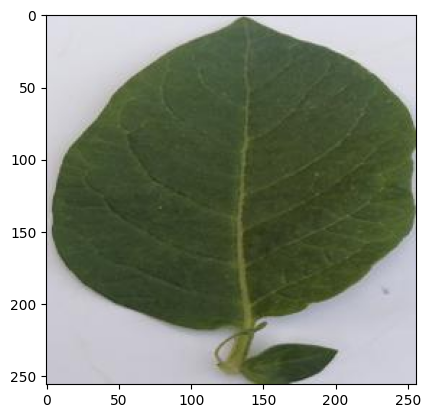

In [ ]:
image='/content/Healthy_90.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")

1/1 [==============================] - 0s 18ms/step
The predicted label for image is: Late_Blight


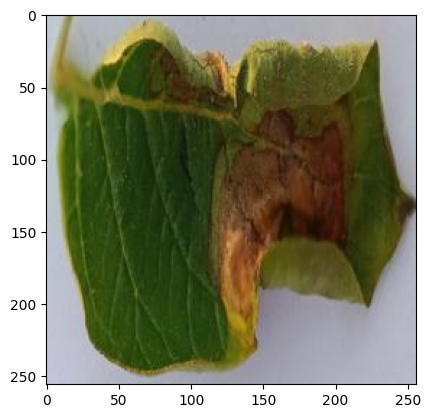

In [ ]:
image='/content/Late_Blight_98.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")

1/1 [==============================] - 0s 17ms/step
The predicted label for image is: Late_Blight


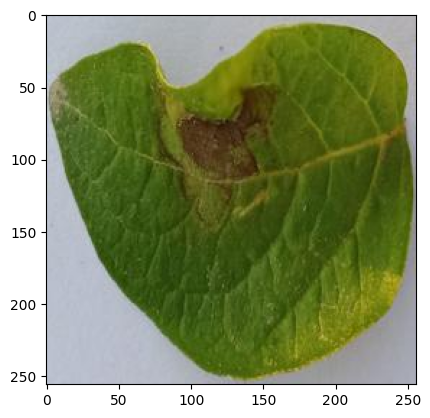

In [ ]:
image='/content/Late_Blight_99.jpg'
image=tf.keras.utils.load_img(image,target_size=(256,256))
img_arr=tf.keras.utils.array_to_img(image)
img_final=tf.expand_dims(img_arr,0)
predict=model.predict(img_final)
predicted_label = labels[np.argmax(predict)]
plt.imshow(image)
print(f"The predicted label for image is: {predicted_label}")